In [10]:
%matplotlib inline

# Perceptrons: Building Blocks for Neural Networks

In [11]:
import matplotlib.pyplot as plt
import numpy as np

What if we had a flexible way to represent functions without having to implement each one ourselves, by hand?<br>
Introducing: the first building block (with some modification) of a neural network, the perceptron! 

We'll give it input and output pairs, and it will learn how to combine the inputs to give the right output!

Let's have a look at this introduction: https://jalammar.github.io/visual-interactive-guide-basics-neural-networks/


Now let's implement a perceptron ourselves! In a bit, we'll make one that can categorize vowels as a function of their first and second formants!<br>
But to start off with, we'll practice setting up a perceptron so it can compute a simple logical function you may be familiar with: AND <br>
It has 2 inputs (let's call them input1 and input2). Each input has a value of True or False. <br>
If both inputs are True, then the output of the function (input1 AND input2) is True. Otherwise, the output is False. 

|Input1 | Input2 | Input1 AND Input2|
|---|---|---|
|True|True|True|
|True|False|False|
|False|True|False|
|False|False|False|

We can also represent True and False with numbers, where True is 1 and False is 0. This is the representation we'll be using, since the perceptron takes numbers as input!

|Input1 | Input2 | Input1 AND Input2|
|---|---|---|
|1|1|1|
|1|0|0|
|0|1|0|
|0|0|0|





## Before we start making a perceptron that can compute this function, let's plot what the input looks like! 
We can put input1 on the X axis, input2 on the Y axis, and label each point with what we want the output to be. People sometimes call all the possible inputs "the input space."


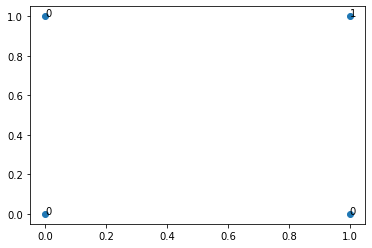

In [12]:
#Define lists with the values for input1 and input2
input1 = [1,1,0,0]
input2 = [1,0,1,0]
#and the output, which is the value for input1[i] AND input2[i] for each index i
output_labels = [1,0,0,0]

#Plot the input values
plt.scatter(input1, input2)
#Label them with the output values
for i, label in enumerate(output_labels):
    plt.annotate(label, (input1[i], input2[i]))


Now we're ready to build our AND perceptron!

### Perceptron Math

There are 4 main parts to a perceptron:<br>
-The inputs (x1...xn); in our AND example, there are only 2.

-The weights (w1...wn) that go with each input; in our AND example, there are only 2.

-The bias term (w0)

-The activation function(o): it takes in the weighted sum plus the bias, transforms it some way(there are lots of different activation functions people use!), then gives the output of the perceptron! 

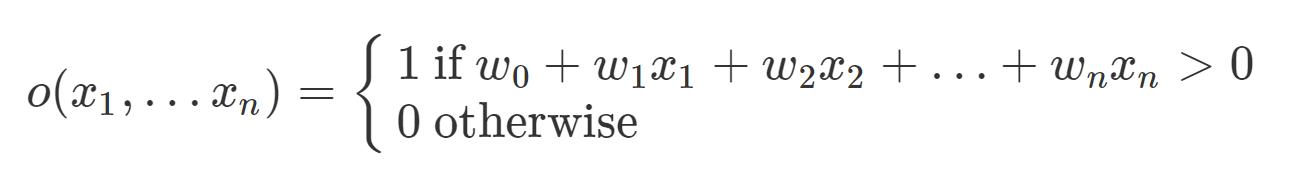

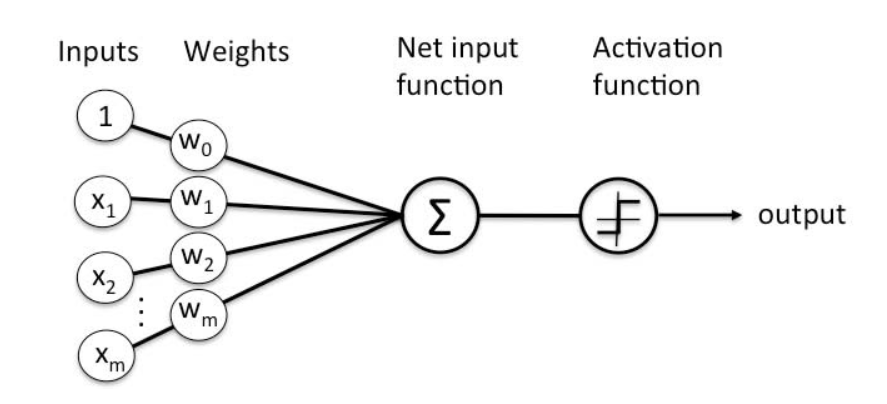

Because want our perceptron to do logical AND, we want our outputs to always be 1(representing True) or 0(representing False). We can pick an activation function that achieves this for us! It's called a Step Function. It returns 0 for any value below the threshold, and 1 for any value above the threshold! 

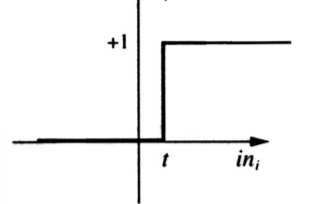

In [13]:
def step_function(input_value):
    threshold = 0 #Let's make our threshold 0
    #Compute the output of the step function here!
    
    
    return int(input_value > threshold) #Replace this dummy return statement with the output of the step function!

Next, let's combine the inputs, weights, and biases!
Then, we can plug that into the activation function we just wrote.

In [14]:
def compute_perceptron_output(input1, input2, weight1, weight2, bias):
    #Compute the weighted sum of the inputs, plus the bias!
    weighted_sum = input1*weight1 + input2*weight2 + bias
    #Compute the output(plug the weighted sum into the activation function so we can get 0 or 1)!
    
    return step_function(weighted_sum) #Replace this dummy return statement with the actual output!

    

Let's check our math! What output should a perceptron give when:

input1 = 1 <br>
input2 = 0 <br>
weight1 = .5 <br>
weight2 = .8 <br>
bias = 1 <br>

?

In [15]:
#Does our code get the same result? 
print(compute_perceptron_output(1,0,0.5,0.8,1))

1


We multiplied the weights by the inputs and summed them. What linear algebra function is that similar to? <br>
When working with lots of inputs, people often use a vector of weights and an input matrix instead of typing out each weight and input individually! <br>
We'll stick with just computing individually with input1, input2, weight1, and weight2 for now, though.

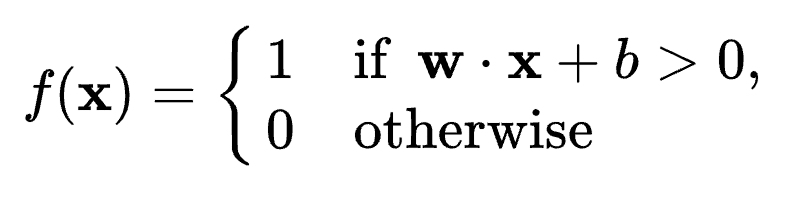

Now, we have all the parts for coding our own perceptrons! But wait... we still need to get it to compute the AND function for us!

 We know what our input-output pairs are. What parts of a perceptron can we change to get it to compute all sorts of different functions(including AND)?

In [16]:
#TODO: Show an example with an OR perceptron.

Exercise: Try to compute by hand what settings(see question above!) the perceptron should have to compute AND.

|Input1 | Input2 | Input1 AND Input2|
|---|---|---|
|1|1|1|
|1|0|0|
|0|1|0|
|0|0|0|


If it's getting troublesome doing it by hand, here's a neat way to think about it: Remember that the perceptron uses a weighted sum of the inputs and a bias. Does that remind you of anything from algebra? It then uses a threshold to decide whether to output 1 or 0. (Remember the Jay Alammar housing prices?) 

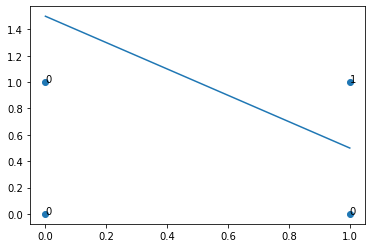

In [17]:
w1 = 1 #Try changing these values!
w2 = 1
bias = -1.5

#Plot the inputs+outputs again
input1 = [1,1,0,0]
input2 = [1,0,1,0]
output_labels = [1,0,0,0]
plt.scatter(input1, input2)
for i, label in enumerate(output_labels):
    plt.annotate(label, (input1[i], input2[i]))
    
#Plot the decision line for a perceptron given its weights and bias
# w1*input1 + w2*input2 + bias > 0 
#the perceptron calls anything above the line 1, anything below the line 0!
# input2 is on the y axis, so we can plot this as:  input2 = -(w1*input1 + bias)/w2
x = np.linspace(0,1)
y = -(w1 * x + bias) / w2
plt.plot(x,y)



In [18]:
#Let's check our AND perceptron settings with the compute_perceptron function we wrote!
for i, label in enumerate(output_labels):
    #Plug in weights+bias here! 
    p_output = compute_perceptron_output(input1[i], input2[i], 1, 1, -1.5)
    print("Inputs:",input1[i],input2[i], " Correct output:", output_labels[i], \
          " Perceptron output:", p_output)

Inputs: 1 1  Correct output: 1  Perceptron output: 1
Inputs: 1 0  Correct output: 0  Perceptron output: 0
Inputs: 0 1  Correct output: 0  Perceptron output: 0
Inputs: 0 0  Correct output: 0  Perceptron output: 0


Okay, cool, so we know a perceptron *can* compute AND. But we had to figure out the weights ourselves, and that's not what we want! Instead, let's make the perceptron learn the weights itself! With something called the...

### Perceptron Learning Rule

How did you find the weights when you were doing it by hand? Any suggestions for how we could do that automatically?

What we want: the values for the weights and the bias that make the perceptron get the right output(or, for more complicated problems than logical AND, as close as possible to the right output)

We can teach the perceptron by showing it examples of the correct input-output pairs!

**Step 1**: Using our current guess for the weights, compute what the perceptron outputs. <br>
**Step 2**: Using the correct output and the input, update the weights.

If the correct output is 1, do we want the weighted sum + bias to be positive or negative? <br>
If the correct output is 0, do we want the weighted sum + bias to be positive or negative?

 If the correct output is 1 but we get 0, is our weighted sum + bias too big or too small? <br>
 If the correct output is 0 but we get 1, is our weighted sum + bias too big or too small?

*Note*: If one of the inputs was 0 for this input-output pair, then it didn't change the weighted sum, so it didn't have any effect on the error this time! So, we can leave its weight alone.

So, for each example it sees, the perceptron can update its weights so it makes a better prediction next time! <br>
Putting it all together for input_i and its weight w_i: <br>
**(new w_i) = (old w_i) + (predicted output - correct output) * input_i**

In [19]:
#TODO: try a couple examples out on the board to make sure this formula is doing what we want!

Ah, but there's a mistake in that update rule! We want the weight to go up when the predicted output is less than the correct output, and we want it to go down when the predicted output is more than the correct output. Here's the correct update rule!

**(new w_i) = (old w_i) + (correct output - predicted output) * input_i**

We can keep showing the perceptron examples over and over until it stops making errors and updating its weights(or until it only updates its weights by teeny tiny amounts). When a perceptron gets to a point in learning when it stops changing its weights, people call this "converging"! Although, sometimes people also just train for a set number of iterations.

One extra piece: Sometimes this weight update can be way too big and cause the weights to jump around erratically. To stop this from happening, we multiply the update by a small number(e.g. 0.001) so the weights don't change as rapidly. This number is called the "learning rate"! So the perceptron learning rule is actually just a tiny bit different: <br>
**(new w_i) = (old w_i) + learning_rate * (correct output - predicted output) * input_i**

Let's implement the perceptron learning rule in code so we can use it to train our perceptrons!

In [20]:
#This function takes the old weight, the learning rate, the predicted output, the correct output, 
#and the input
#And it returns the new weight!
def update_weight(old_w_i, learning_rate, predicted, correct, i):
    return old_w_i+learning_rate*(correct-predicted)*i



Wait, we're forgetting something- how do we update the bias? <br>
There's a trick: we can treat it like a weight where the input is always 1! <br>
For example, if the bias is 3, we can pretend that's actually: <br>
input0 = 1  <--- the dummy input that goes with the bias! <br>
weight0 = 3  <--- the bias!  <br>
weight0 * input0 = 3

In [21]:
#Now that we have a function to update a single weight, let's write a function to use an example
#to update all the weights!
def process_example(input1, input2, correct_output, weight1, weight2, bias, learning_rate):
    #First, compute the perceptron's predicted output(we already wrote a function for this!)
    output = compute_perceptron_output(input1, input2, weight1, weight2, bias)
    new_weight1 = update_weight(weight1, learning_rate, output, correct_output, input1)
    new_weight2 = update_weight(weight2, learning_rate, output, correct_output, input2)
    new_bias = update_weight(bias, learning_rate, output, correct_output, 1)
    return new_weight1, new_weight2, new_bias

#Now that we can process 1 example, let's train our perceptron on all of the examples!
#We'll need to repeat the training either until the weights stop changing a lot
# or until it's seen all the examples some number of times - you decide! When might one be
#better than another?
def train_perceptron(input1s, input2s, outputs, learning_rate, iters=100):
    weight1 = 0 #We also need to pick value to start from; 0 is commonly used!
    weight2 = 0
    bias = 0
    for n in range(iters): #Iterate some number of times or until the weights stop changing! You decide! 
        #When might one be better than the other?
        for index, label in enumerate(outputs): #For each example, update the weights by calling process_example!
            weight1, weight2, bias = process_example(input1s[index], input2s[index], outputs[index], weight1, weight2, bias, learning_rate)
    
    #Return the final weights and bias!
    return weight1, weight2, bias

Now that we can make the perceptron learn on its own, let's make it learn the AND function! 

In [22]:
weight1, weight2, bias = train_perceptron(input1, input2, output_labels, 0.01)
print("Weight1:", weight1, " Weight2:", weight2, " Bias:", bias)



Weight1: 0.01  Weight2: 0.02  Bias: -0.02


Did it learn the AND function? Let's check! <br>
Also, do the weights it learned match the weights we found by hand?

Inputs: 1 1  Correct output: 1  Perceptron output: 1
Inputs: 1 0  Correct output: 0  Perceptron output: 0
Inputs: 0 1  Correct output: 0  Perceptron output: 0
Inputs: 0 0  Correct output: 0  Perceptron output: 0


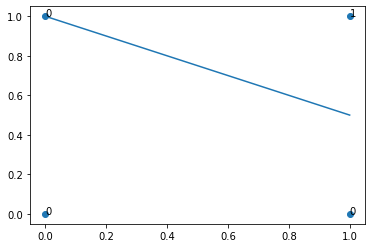

In [23]:
#Check that the perceptron learned the function
for i, label in enumerate(output_labels):
    p_output = compute_perceptron_output(input1[i], input2[i], weight1, weight2, bias)
    print("Inputs:",input1[i],input2[i], " Correct output:", output_labels[i], \
          " Perceptron output:", p_output)
#Plot its decision line
plt.scatter(input1, input2)
for i, label in enumerate(output_labels):
    plt.annotate(label, (input1[i], input2[i]))
x = np.linspace(0,1)
y = -(weight1 * x + bias) / weight2
plt.plot(x,y)

## Review Question 10/26

Let's try one more logic function... It's called XOR! It's true if one or the other input is true, but not both. Here are the inputs and outputs:

|Input1 | Input2 | Input1 AND Input2|
|---|---|---|
|1|1|0|
|1|0|1|
|0|1|1|
|0|0|0|


**Find the weights and bias necessary to model the XOR function by hand!**

A graph of the input space and the correct outputs:

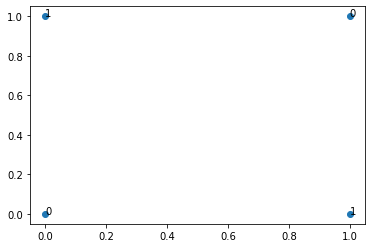

In [24]:
#Define lists with the values for input1 and input2
input1 = [1,1,0,0]
input2 = [1,0,1,0]
#and the output, which is the value of input1[i] AND input2[i] for each index i
output_labels = [0,1,1,0]

#Plot the input values
plt.scatter(input2, input1)
#Label them with the output values
for i, label in enumerate(output_labels):
    plt.annotate(label, (input2[i], input1[i]))

Automated weight learning for XOR:

Weight1: 0.01  Weight2: 0.0  Bias: 0.0
Inputs: 1 1  Correct output: 0  Perceptron output: 1
Inputs: 1 0  Correct output: 1  Perceptron output: 1
Inputs: 0 1  Correct output: 1  Perceptron output: 0
Inputs: 0 0  Correct output: 0  Perceptron output: 0


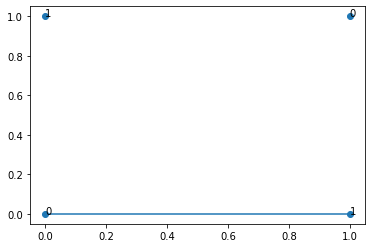

In [25]:
#Train the perceptron and see if it learned the function
weight1, weight2, bias = train_perceptron(input1, input2, output_labels, 0.01)
print("Weight1:", weight1, " Weight2:", weight2, " Bias:", bias)
for i, label in enumerate(output_labels):
    p_output = compute_perceptron_output(input1[i], input2[i], weight1, weight2, bias)
    print("Inputs:",input1[i],input2[i], " Correct output:", output_labels[i], \
          " Perceptron output:", p_output)
    
#Plot the perceptron's decision line
plt.scatter(input2, input1)
for i, label in enumerate(output_labels):
    plt.annotate(label, (input2[i], input1[i]))
x = np.linspace(0,1)
y = -(weight2 * x + bias) / weight1
plt.plot(x,y)

### Now let's train a perceptron to classify real sound data!

First, let's read in the data. It's a .csv file where each row is an English vowel token's measurements: F1(the first formant), F2(the second formant). <br>
Each row also has the vowel's classification by human phoneticians (although the labels aren't in IPA; they're in another format called ARPABET, which is just supposed to be easier to use on a keyboard). <br>
We're going to just focus on classifying whether a vowel is "iy"(ie, high front unrounded i) or ao(low-mid back rounded, which you may have heard as "open o").

Here are some more ARPABET symbols for vowels:<br>
iy: close front unrounded <br>
ih: near-close front unrounded <br>
ey: close-mid front unrounded <br>
eh: open-mid front unrounded <br>
ah: open back rounded <br>
ao: open-mid back rounded <br> 
ow: close-mid back rounded <br> 
uw: close back rounded <br>
ax: mid central unrounded <br>

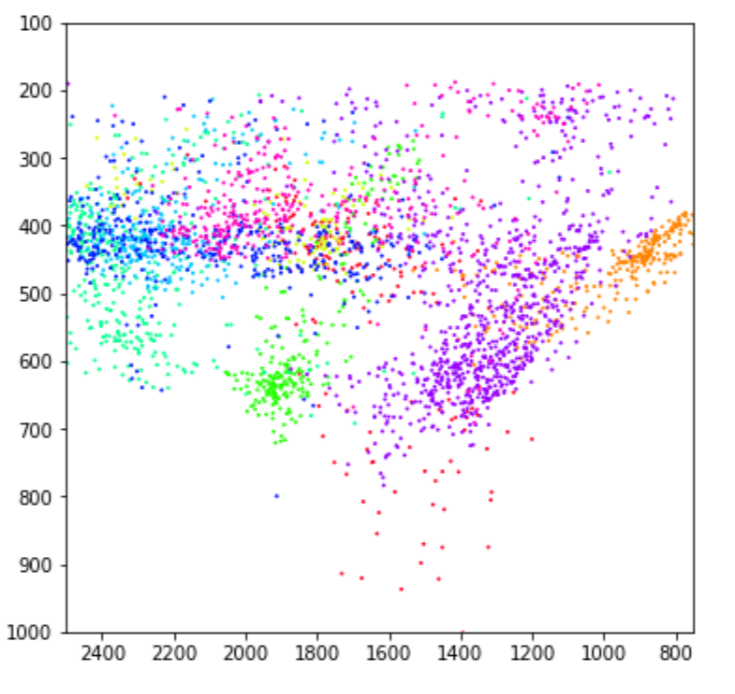

In [26]:
import pandas as pd #Pandas is a library for reading big datasets, like our csv; don't worry about
#the details of how to use it for now!

data = pd.read_csv('https://raw.githubusercontent.com/efosler/cse5522data/master/vowelfmts.csv')
#Quick example: you can get the values of certain columns like this:
data["f1"] #returns the f1 values for all of the rows

#This picks out just the rows that are eh or ao vowels, and just the f1, f2, and vowel classification columns
#You can try classfying different combos of vowels!
original_data = data
data = data.query('vowel == "eh" or vowel == "ao"')[["f1", "f2", "vowel"]] 
print(data)


             f1           f2 vowel
175  381.109863   772.107178    ao
176  382.500549   770.784546    ao
177  384.192322   779.954834    ao
178  384.309601   752.953674    ao
179  386.642151   772.087769    ao
..          ...          ...   ...
779  704.438904  1921.062866    eh
780  710.951782  1899.449829    eh
781  716.783264  1889.768311    eh
782  718.524353  1900.947632    eh
783  720.948730  1915.915039    eh

[494 rows x 3 columns]


Let's plot them to see what the input and labels look like!

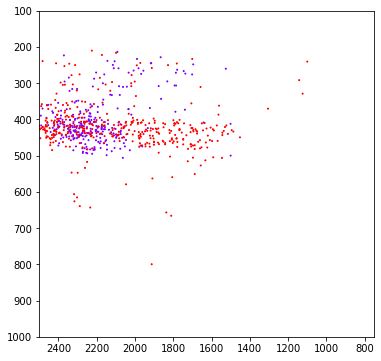

In [42]:
#Assign a color to each vowel
vowels=data['vowel'].unique()
for i in range(vowels.shape[0]):
    vmap[vowels[i]]=float(i)/float(vowels.shape[0]-1)
data['color']=data['vowel'].map(vmap) #This makes a new column where each vowel type gets its own color
plt.figure(num=1,figsize=(6,6))
plt.scatter(data['f2'],data['f1'],s=1,c=data['color'],cmap='rainbow')
plt.gca().set_ylim([100,1000])
plt.gca().set_xlim([750,2500])
#This inversion is to make the plot line up with the vowel chart we're used to: high vowels toward the top
# and back vowels toward the right
plt.gca().invert_xaxis() 
plt.gca().invert_yaxis()

Now that we've taken a look at the data, let's train a perceptron to classify it! We've already written the functions we'll need! 

In [28]:
#Let's convert the data to numpy arrays since we know how to work with those better than Pandas
f1 = np.array(data["f1"])
f2 = np.array(data["f2"])
color = np.array(data["color"])
output_labels = np.array(data["vowel"])
#We can call 'eh' 0 and 'ao' 1
output_labels = output_labels == 'ao'


f1_weight, f2_weight, bias = train_perceptron(f1, f2, output_labels, 1, iters=10000)



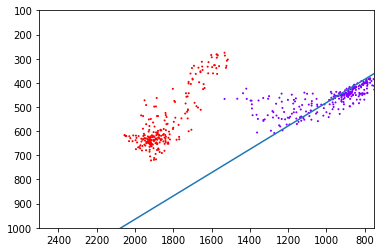

In [43]:
#Plot the labeled points
plt.scatter(f2, f1, s=1,c=color,cmap='rainbow')

#Make the axes match the standard vowel chart
f1_lower = 100
f1_upper = 1000
f2_lower = 750
f2_upper = 2500
plt.gca().set_ylim([f1_lower,f1_upper])
plt.gca().set_xlim([f2_lower,f2_upper])
plt.gca().invert_xaxis() 
plt.gca().invert_yaxis()
x = np.linspace(f2_lower,f2_upper)

#Plot the decision line
y = -(f2_weight * x + bias) / f1_weight #how big does the bias need to be to get good separation?
plt.plot(x,y)

In [118]:
print(f1_weight, f2_weight, bias)

1698.550717102177 -872.0728026117797 52.60000000000048


f2 and f1 have very different ranges. As we talked about last time, this can bring a lot of problems for learning, e.g. the input with the larger values starts out with more power to affect the prediction than the input with the smaller values. In this case, there's another issue; looking at the graph, the bias needs to be really high, but if we brought our data down to a more reasonable scale, we won't have to increase the bias so much. 
There are many ways to normalize/standardize a dataset(https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff) to control its scale. For now, we'll use this formula to standardize: <br>
Normalized f1 = (f1 - average_f1) / (standard deviation of f1) <br>
Normalized f1 = (f2 - average f2) / (standard deviation of f2)

Some useful numpy functions: <br>
Average: https://numpy.org/doc/stable/reference/generated/numpy.average.html<br>
Standard deviation: https://numpy.org/doc/stable/reference/generated/numpy.std.html
To divide a numpy array by a scalar, it's pretty neat: you can just use the regular "/" notation on numpy arrays like you would for regular numbers! 

In [173]:
f1 = #Standardize f1 here!
f2 = #Standardize f2 here!

In [174]:
#Re-run the perceptron learning with the normalized inputs
f1_weight, f2_weight, bias = train_perceptron(f1, f2, output_labels, 1, iters=10000)


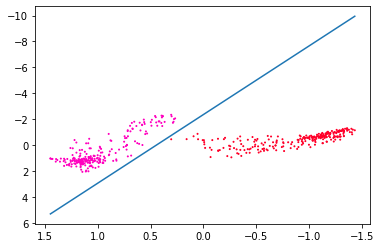

In [168]:
#Plot the labeled points
plt.scatter(f2, f1, s=1,c=color,cmap='rainbow')

#Make the axes match the standard vowel chart
plt.gca().invert_xaxis() 
plt.gca().invert_yaxis()
x = np.linspace(min(f2),max(f2))

#Plot the decision line
y = -(f2_weight * x + bias) / f1_weight #.15
plt.plot(x,y)

In [169]:
print(f1_weight, f2_weight, bias)

0.8455344172465777 -4.467418372242029 2


Let's have a look at another pair of English vowels, say, the high front lax vowel vs the high front tense vowel. 

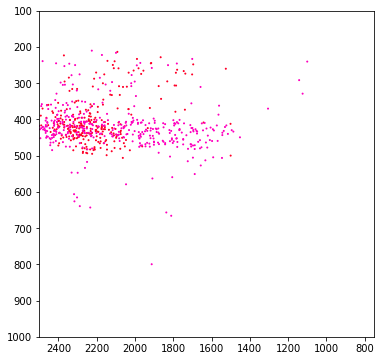

In [30]:
#This picks out just the rows that are iy or ih vowels, and just the f1, f2, and vowel classification columns
#You can try classfying different combos of vowels!
data = original_data.query('vowel == "iy" or vowel == "ih"')[["f1", "f2", "vowel"]] 
#Assign a color to each vowel
vowels=data['vowel'].unique()
vmap={}
for i in range(vowels.shape[0]):
    vmap[vowels[i]]=float(i)/float(vowels.shape[0]-1)
data['color']=data['vowel'].map(vmap) #This makes a new column where each vowel type gets its own color
plt.figure(num=1,figsize=(6,6))
plt.scatter(data['f2'],data['f1'],s=1,c=data['color'],cmap='rainbow')
plt.gca().set_ylim([100,1000])
plt.gca().set_xlim([750,2500])
#This inversion is to make the plot line up with the vowel chart we're used to: high vowels toward the top
# and back vowels toward the right
plt.gca().invert_xaxis() 
plt.gca().invert_yaxis()



What do you think would happen if we tried to get a perceptron to learn to classify these vowels?

# Stacking Perceptrons: Neural Networks

Remember our linear separability problem when we tried to get a perceptron to learn XOR? What if we have several perceptrons combined? We can feed perceptrons' output as an input to another perceptron!

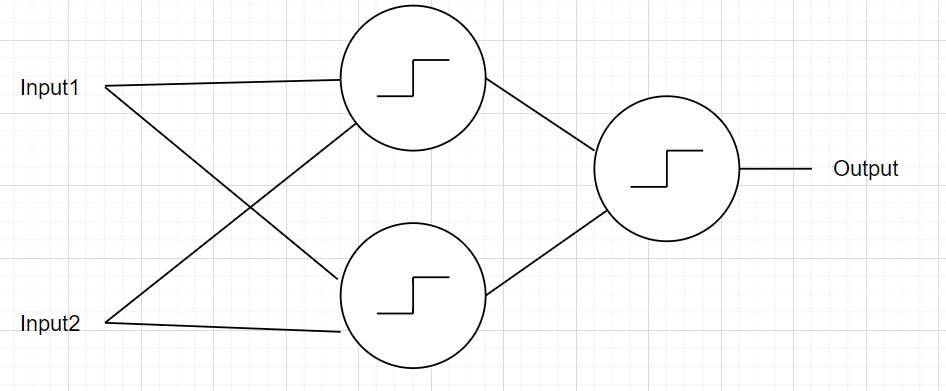

**Exercise**: Try to find the weights for each perceptron in the network that would get it to model XOR! It may help to break down the steps of calculating XOR from other logic functions and think of each perceptron in the network as having a specific job.

Here's what a general neural network looks like. Pretty much the same idea but with more inputs and more stacked-up perceptrons! ...and the wonderful thing is, we're no longer constrained to learning linear functions! In theory, we can learn to classify all sorts of data! <br>
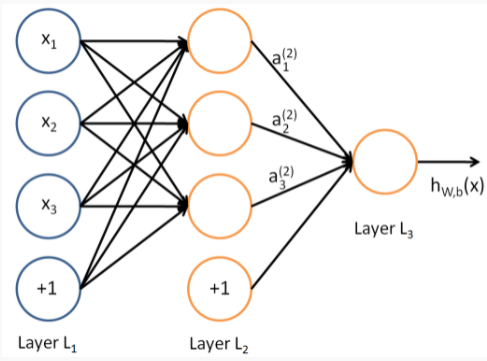

Side note, some terminology:  <br>
    -Each individual perceptron circle: a **unit** <br>
    -A group of units that get the same inputs and feed their outputs to the same places: a **layer** <br>
    -The units that aren't directly connected to the input or the output: **hidden units** / **hidden layer** <br>
    -The output of a unit: its **activation** (because it's the weighted sum fed through the activation function!)
    

### Training Neural Networks

The intuition from training perceptrons is the same! We have examples of the right inputs+outputs, and we adjust the weights to get closer to the right outputs.

In perceptron learning, we just subtracted the correct and predicted outputs. Neural network training has the same intuition, but it's a bit more complicated and generalized. <br>

A function that tells us how well the model is doing is called an **objective function**, which the model tries to maximize by learning. Sometimes it's called a **loss function** and the model minimizes it instead. We can make the objective/loss function whatever we want!<br>

For example, we could make our the squared error of the model's predictions: <br>
**(1/2)(model output - correct output)^2** <br>
and then the neural network can learn to minimize that error. <br>
But whatever we choose, neural network training is all about finding the weights that minimize error (or depending on the function we choose, maximize performance)

In [ ]:
#TODO: Show Jay Alamar graph with weights and error

#### How do we minimize error? Gradient Descent

We want to know how changing each weight affects the model's error, defined by the loss function. What tool from calculus could tell us that?

The slope of the error with respect to each weight: the gradient (partial derivatives) <br> 
The gradient tells us how changes in each weight changes the error; that's exactly what we want if we need to find the weights that minimize error! <br>


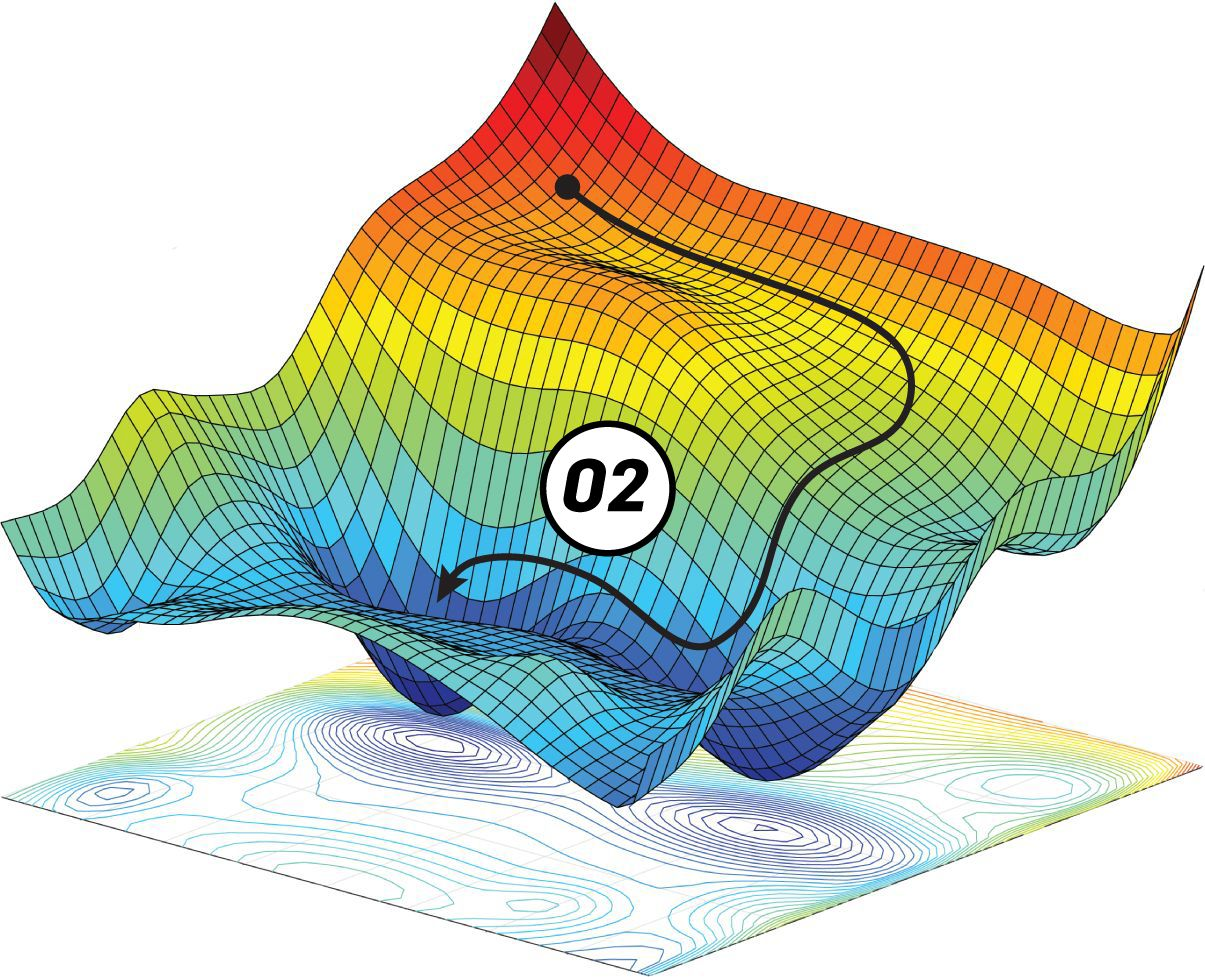

So, for each unit in the network, we can use the derivative of the error function with respect to its input weights to update those weights!

**Question:** The activation function we've been using so far is the step function. Why is that going to be a problem now?

Let's start by adjusting the weights for the very last layer, next to the output: <br>
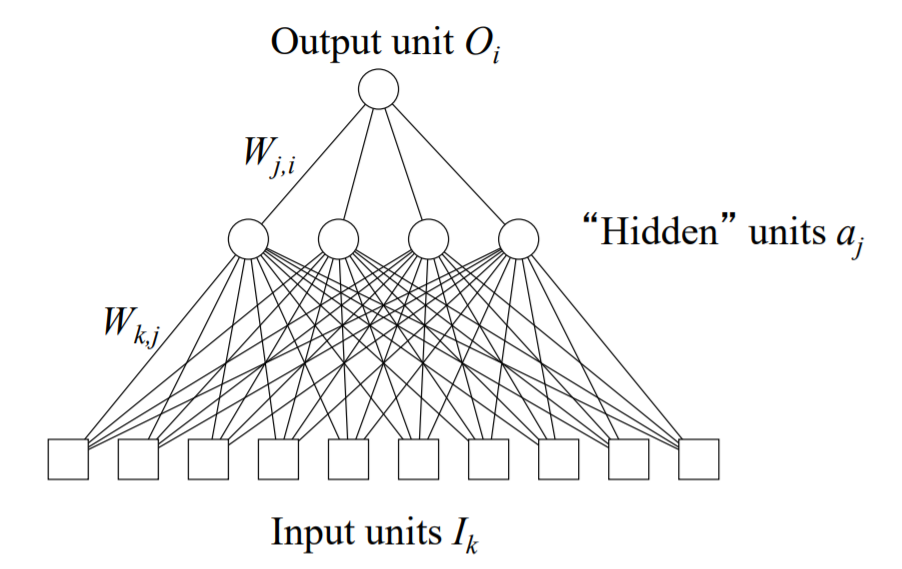

--The following derivative math is from Gaja's 692c slides! :D (But it's the standard math for gradient descent that works for NNs, not specific to 692c!) -- <br>
<br>
Let's start with the layer of units right next to the output. <br>
Correct(also sometimes called "gold") output for example i: y_i <br>
Inputs to the last unit: x_1, x_2, x_3...x_k 
Weights going into the last unit: w_1, w_2, w_3...w_k 
Output of network for example i: o_i <br>
Activation function: f <br>
Remeber this is how we calculate the output of each unit! 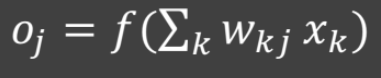 <br>
Here's the derivative we need to find; it tells us how changing the weights affects the error!
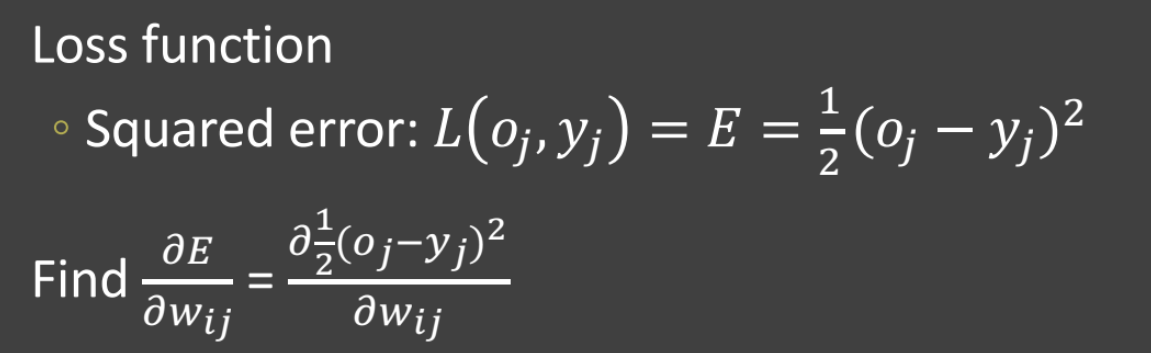 <br>
After some calculus... <br>
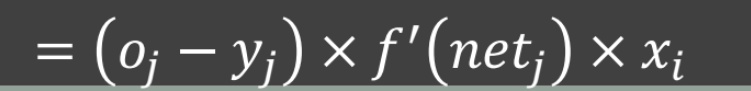
So, our weight update is: <br>
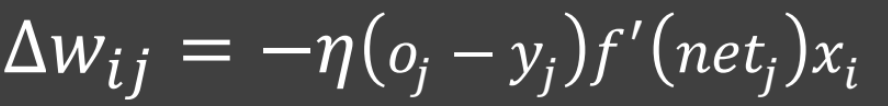




(look familiar?)

But wait! What about the other layers? <br>
For the last layer, we know what we want the output to be (the gold/correct output!), so we know what the error is. <br> 
What should the output/error be for the other layers?

**Backpropagation**

Since we don't know what the right output should be for the hidden layers, we can calculate the error at the output layer and pass the blame backwards to the hidden units based on how much influence they had on the output unit! <br>
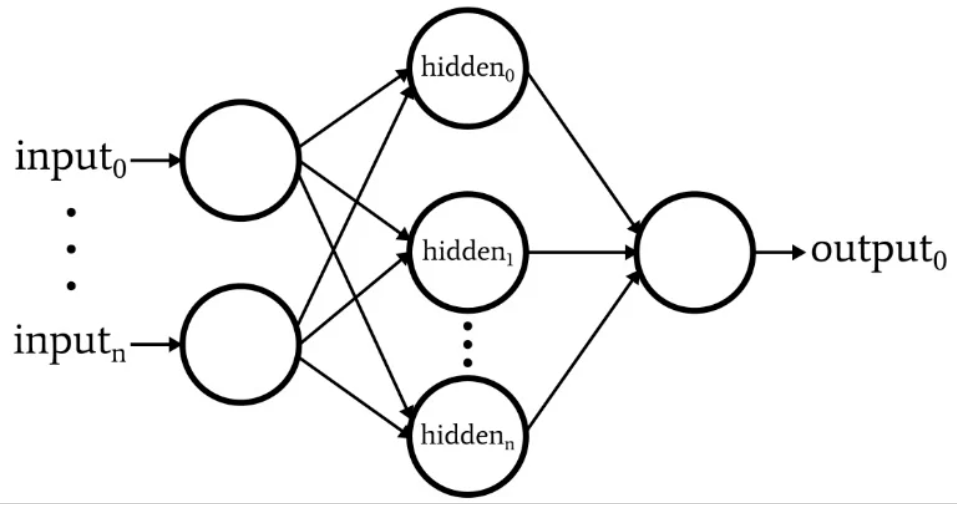

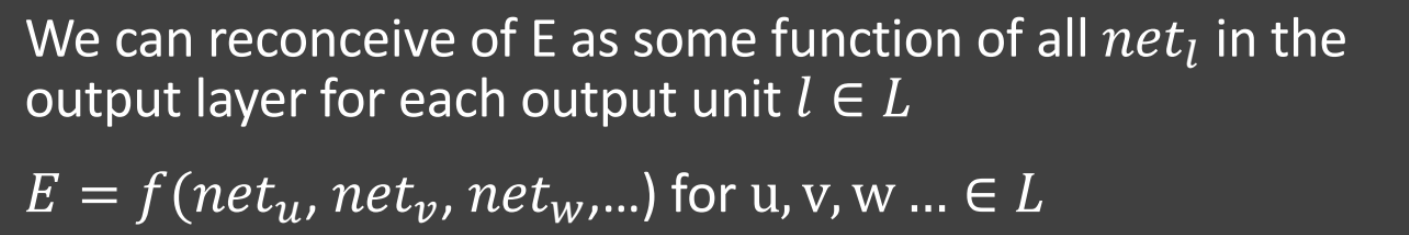

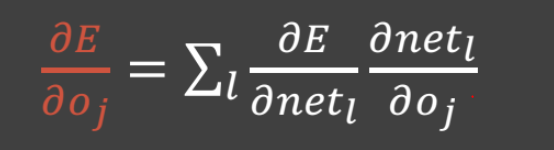

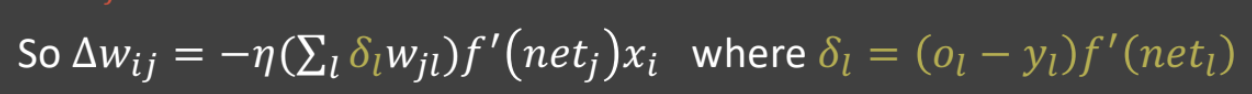

### This notebook was based on:

Visual and graph-y introduction on neural networks: https://jalammar.github.io/visual-interactive-guide-basics-neural-networks/ 

Math-y tutorial on perceptrons: https://www.simplilearn.com/tutorials/deep-learning-tutorial/perceptron#biological_neuron 

Comprehensive introduction to neural networks(but it's really dry): http://web.cse.ohio-state.edu/~barker.348/cse3521_su19/Perceptrons.pdf The vowel+formant activity drew from an in-class activity from the next class in this series, but I don't think it's available online. Let me know if you want a copy! 

Perceptron learning rule: https://computing.dcu.ie/~humphrys/Notes/Neural/single.neural.html <br>
Perceptron learning rule(with vectors!): https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975

Comprehensive tutorial: http://ufldl.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/

Gradient descent: https://blog.paperspace.com/part-2-generic-python-implementation-of-gradient-descent-for-nn-optimization/

Backpropagation: https://www.allaboutcircuits.com/technical-articles/understanding-training-formulas-and-backpropagation-for-multilayer-perceptrons/

XOR/Linear separability intuitions: https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7

XOR walkthrough: https://blog.abhranil.net/2015/03/03/training-neural-networks-with-genetic-algorithms/